# WORDLE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm import tqdm as ProgressDisplay
import math

### Lecture des fichiers de mots de 5 lettres

In [3]:
# mots_1 = pd.read_json("mots.json")
# mots = pd.read_table("mots.txt",header=None) #version science etonnante
mots = pd.read_json("mots_off.json") #officielle depuis loane
words = pd.read_json("wordle_us.json")
data = mots.copy()
# alphabet= np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
# alphabet= np.array(list('abcdefghijklmnopqrstuvwxyz'))
# frequence = {}
# for l in alphabet:
#     frequence[l]=0
# data.shape
dimension = data.size
print(dimension)

6025


### Convertir un array en string

In [4]:
def convert_array_mot(arr):
    return np.array([''.join(chr(e) for e in ligne )for ligne in arr])

### Convertir une string en array

In [5]:
def convert_mot_array(mots):
    return np.array([[ord(c)for c in w] for w in mots], dtype=np.uint8)

In [6]:
mots_array = convert_mot_array(data[0])
mots_array.shape
words_array = convert_mot_array(words[0])
words_array.shape

(12947, 5)

## Algorithm principal
 qui renvoie les options valides pour un mot, une pattern et une liste de mots
 * check : mot à tester
 * pattern : la pattern de type '01120'
 * M : le dictionnaire de mots

In [7]:
def check_mot_pattern(check,pattern,M=mots_array.copy(),k=5):
    # M = mots_array.copy()
    cnt = M.shape[0]
    for n in range(k):  # k = nb de lettres dans le mot
        c =ord(check[n])
        if (pattern[n]=='0'):
            # for i in range(k):
            #     M = M[~(M[:,i] == c)]
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] == 0)]
            M = np.delete(M,0,axis=1)
        elif (pattern[n]=='2'):
            M = M[(M[:,n] == c)]
        else: # (pattern[n]=='1'):
            M = M[~(M[:,n] == c)] # on elimine la bonne postion
            # P = (M[:] == c)
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            # T = (np.sum(P[:], axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] > 0)]
            M = np.delete(M,0,axis=1)
    return M,M.shape[0]

In [586]:
def check_mot_pattern_new(check,pattern,M=mots_array.copy(),k=5):

    E=[]
    I=[]
    O=[]
    for i in range(k):
        p=pattern[i]
        if (p=='0'):
            a = np.array((int(i) ,int(ord(check[i]))), dtype=np.uint8) # np.int16)
            O = np.append(O,a,axis=0)
        elif (p=='1'):
            I.append([i, ord(check[i])])
        elif (p=='2'):
            E.append([i, ord(check[i])])
    try:      
        dO = int(O.shape[0] / 2)
        if (dO>0):
            O = O.reshape(dO,2)
        for j in O:
            M = M[(M[:,int(j[0])] != int(j[1]))]
        for i in E:
            O = O[(O[:,1] != i[1])]
    except:
        a=0
        # print('erreur')
    for i in E:
        M = M[(M[:,i[0]] == i[1])]

    for i in O:
        # c = ord(check[i])
        P = (np.sum(M[:] == i[1],axis=1)).reshape((1,M.shape[0]))
        M = np.insert(M,0,P,axis=1)
        M = M[(M[:,0] == 0)]
        M = np.delete(M,0,axis=1)

    for i in I:
        # c = ord(check[i])
        M = M[~(M[:,i[0]] == i[1])] # on elimine la bonne postion
        P = (np.sum(M[:] == i[1],axis=1)).reshape((1,M.shape[0]))
        M = np.insert(M,0,P,axis=1)
        M = M[(M[:,0] > 0)]
        M = np.delete(M,0,axis=1)

    return M, M.shape[0]

In [587]:
#test new mot
mat, n = check_mot_pattern_new('AEREE','00002')
print(n,convert_array_mot(mat))
mat, n = check_mot_pattern('AEREE','00002')
print(n,convert_array_mot(mat))

555 ['COMME' 'TOUTE' 'HOMME' 'MONDE' 'CHOSE' 'DONNE' 'DOUTE' 'FILLE' 'SUITE'
 'BONNE' 'VILLE' 'ECOLE' 'JUSTE' 'ETUDE' 'ENVIE' 'PIECE' 'MILLE' 'SIGNE'
 'LIGNE' 'ELEVE' 'TOMBE' 'SCENE' 'UNITE' 'SOMME' 'MONTE' 'PLUIE' 'COUPE'
 'FOULE' 'COMTE' 'ONCLE' 'BOITE' 'POSTE' 'POCHE' 'LUTTE' 'STYLE' 'TOILE'
 'HONTE' 'SIEGE' 'DOUCE' 'DOUZE' 'NULLE' 'POETE' 'NOMME' 'EXIGE' 'MINCE'
 'SONGE' 'LISTE' 'UTILE' 'CHUTE' 'FOLIE' 'FOLLE' 'PITIE' 'HUILE' 'BLEUE'
 'USINE' 'QUEUE' 'BOUGE' 'JOLIE' 'CYCLE' 'PLUME' 'VOILE' 'LINGE' 'SITUE'
 'POMME' 'NUQUE' 'COLLE' 'GUIDE' 'BOULE' 'POEME' 'ISSUE' 'FONDE' 'PISTE'
 'CULTE' 'FUITE' 'PIQUE' 'DIGNE' 'FOSSE' 'NOBLE' 'COULE' 'SOUPE' 'SONNE'
 'TIEDE' 'THESE' 'THEME' 'COUDE' 'COUTE' 'VOUTE' 'POUCE' 'MYTHE' 'LISSE'
 'SUEDE' 'GOSSE' 'ISOLE' 'BOMBE' 'CONGE' 'CHINE' 'POMPE' 'GLOBE' 'FONCE'
 'COPIE' 'CHENE' 'PIEGE' 'GUISE' 'BIBLE' 'FICHE' 'QUETE' 'MOLLE' 'SOLDE'
 'BUSTE' 'BONTE' 'ECUME' 'FINIE' 'EVITE' 'MOINE' 'VIGNE' 'PINCE' 'POULE'
 'MIXTE' 'SINGE' 'FONTE' 'JUIVE' 'POELE' 'CLOSE

In [519]:
# test check mot DEBIT avec PETIT
mat, n = check_mot_pattern('PETIT','02022')
print(n,convert_array_mot(mat))
mat, n = check_mot_pattern_new('PETIT','02022')
print(n,convert_array_mot(mat))

0 []
0 []


In [72]:
M=mots_array.copy()
# print(M)
c=ord('E')
print(c,M.shape)
# print(M[~(M[:] == c)].shape)
P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
M = np.insert(M,0,P,axis=1)
M = M[(M[:,0] == 0)]
M = np.delete(M,0,axis=1)
print(M.shape,M)


69 (6025, 5)
(2438, 5) [[65 85 83 83 73]
 [81 85 65 78 68]
 [65 76 79 82 83]
 ...
 [81 85 73 80 85]
 [72 73 78 68 73]
 [83 76 65 78 71]]


In [40]:
ret = mots_array.copy()
ret, nb = check_mot_pattern('RIMES','00100',ret)
if (nb>0):
    entropie = -log2_(nb,dimension)
else:
    entropie=0
print(nb,dimension,entropie,convert_array_mot(ret))

55 6025 -6.775385812480026 ['CHAMP' 'AMANT' 'PLOMB' 'ALBUM' 'MATCH' 'AMONT' 'MACON' 'MAGMA' 'MATOU'
 'MAGOT' 'MOULT' 'MATON' 'MOLLO' 'MOULU' 'MULLA' 'TAXUM' 'MANUL' 'LOUMA'
 'XALAM' 'MAQAM' 'MANOU' 'MANTA' 'MUNDA' 'MUNGO' 'OGHAM' 'MULCH' 'MANON'
 'MANAT' 'MYTHO' 'CLAMP' 'NDAMA' 'FANUM' 'MODAL' 'MALON' 'MAZOT' 'MANGA'
 'FATMA' 'MULOT' 'MACHO' 'MOGOL' 'FATUM' 'MATAF' 'MACHA' 'MUANT' 'BLOOM'
 'MOLTO' 'MANDA' 'CAVUM' 'DOUMA' 'PLUMA' 'MOULA' 'MULON' 'MOUND' 'AMBON'
 'MANGO']


In [9]:
def lettre_in(lettre,mot):
    return mot.find(lettre) 

## Creation de la pattern globale pour l'ensemble de 243 permutations (3^5)

In [10]:
def make_pattern(p=5):
    pattern=[]
    for k in range(pow(3,5)):
        if (k<1):
            pattern.append(np.base_repr(k,3,5))
        elif (k<3):
            pattern.append(np.base_repr(k,3,4))
        elif (k<9):
            pattern.append(np.base_repr(k,3,3))
        elif (k<27):
            pattern.append(np.base_repr(k,3,2))
        elif (k<81):
            pattern.append(np.base_repr(k,3,1))
        else:
            pattern.append(np.base_repr(k,3))
    return pattern

In [11]:
pattern = make_pattern(5)

## Calcul de l'Entropie

In [12]:
def log2_(val,div):
    return math.log2(div/val) if val >0 else 0

In [566]:
def entropie_mot_old(check, M=mots_array.copy()):
    dim = M.shape[0]
    e_sum=0
    e_pattern=[]
    for p in pattern:
        ret, nb = check_mot_pattern(check,p,M)
        # print(nb,p,dim)
        e = log2_(nb,dim)
        e_pattern.append(e)
        e_sum = e_sum + e*nb/dim
    return e_sum,e_pattern


In [567]:
def entropie_mot(check, M=mots_array.copy()):
    dim = M.shape[0]
    e_sum=0
    e_pattern=[]
    for p in pattern:
        ret, nb = check_mot_pattern_new(check,p,M)
        # print(nb,p,dim)
        e = log2_(nb,dim)
        e_pattern.append(e)
        e_sum = e_sum + e*nb/dim
    return e_sum,e_pattern


4.746904916753604


<BarContainer object of 243 artists>

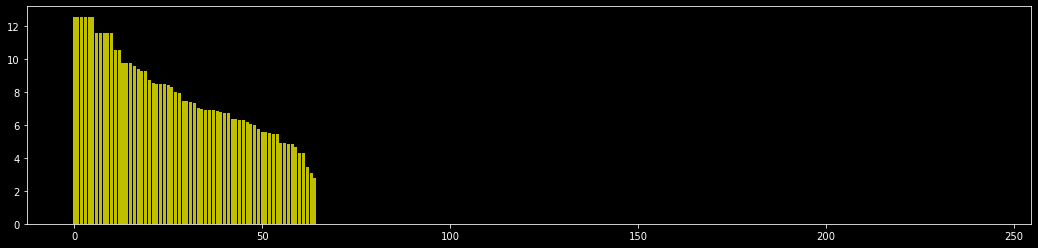

In [568]:
e, e_p = entropie_mot_old('AEREE')
print(e)
gr = np.sort(e_p)[::-1]
# print(gr)
plt.figure(figsize=(18,4))
plt.bar(x=range(243),height=gr,color='y')

erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
12.110146133542305


<BarContainer object of 243 artists>

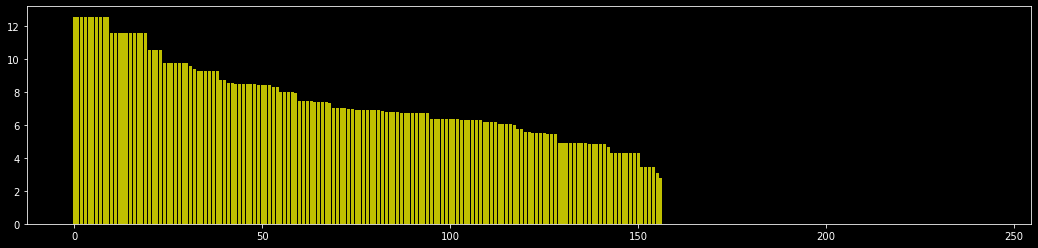

In [570]:
e, e_p = entropie_mot('AEREE')
print(e)
gr = np.sort(e_p)[::-1]
# print(gr)
plt.figure(figsize=(18,4))
plt.bar(x=range(243),height=gr,color='y')

# Calcul initial

Cela permet de déterminer dans 'liste_entropie' l'entropie de tous les mots dans le dictionnaire

L'entropie c'est : E = - log(p)/log(2)
ou p est la probabilité


In [488]:
# initialement 9m05s ... maintenat 12:50 avec 6025 mots
liste_entropie = {}
for mot in ProgressDisplay(data[0]):
    liste_entropie[mot] = entropie_mot(mot)[0]
liste_entropie = sorted(liste_entropie.items(), key=lambda x: x[1],reverse=True)

100%|██████████| 6025/6025 [06:30<00:00, 15.41it/s]


In [489]:
h = liste_entropie[0:10]
# print(list(iter(h)))
# for item in h:
#     for i in item:
#         print(i[::-1])
print(h)

[('AEREE', 13.43646486042466), ('RENEE', 12.616458336681012), ('TETEE', 12.508887785507872), ('LESEE', 12.508496501938328), ('GEREE', 12.15367106049319), ('SEMEE', 11.910969778894263), ('PESEE', 11.898593212812738), ('CELEE', 11.800023249000684), ('PELEE', 11.709636290927472), ('PETEE', 11.694754094463391)]


## Aide au jeux
temps initial = 6,6s

Nous proposons RIMES
et calculons au préalable sont Entropie = 5,71971

nous jouons pour obtenir un résultat ⬛⬛🟨⬛⬛ soit '00100'

au final l'Entropie de ce choix est de 6,775 puisqu'il nous reste plus que 55 possibilités


In [26]:
E, E_detail = entropie_mot('RIMES')
print("Entropie de 'RIMES' = ",E)
ret,e = check_mot_pattern('RIMES','00100')
# print(pattern.index('00100')) marche pas car retrié !!!
print("Entropie si pattern='00100' ",math.log2(dimension/e))


Entropie de 'RIMES' =  5.719713732680308
Entropie si pattern='00100'  6.775385812480026


In [362]:
def conseil(check,pattern,M=mots_array.copy()):
    ret, nb = check_mot_pattern_new(check,pattern,M)
    E = -log2_(nb,M.shape[0])
    new_liste = convert_array_mot(ret)
    # print(nb, E)
    new_entropie = {}
    for mot in ProgressDisplay(new_liste):
        new_entropie[mot] = entropie_mot(mot,ret)
    # print(f'Test : {new_entropie}')
    return(list(new_entropie))

In [363]:
# 
ret, nb = check_mot_pattern('MOULE','00001',mots_array.copy())
E = - log2_(nb,dimension)
new_liste = convert_array_mot(ret)
print(nb, E)
new_entropie = {}
for mot in ProgressDisplay(new_liste):
    new_entropie[mot] = entropie_mot(mot,ret)
new_entropie = sorted(new_entropie.items(), key=lambda x: x[1],reverse=True)


682 -3.1431175969805136


100%|██████████| 682/682 [00:21<00:00, 32.36it/s]


In [364]:
print(dimension,ret.shape)
# print(f'Test : {new_entropie[:20]}')

6025 (682, 5)


In [39]:
# ret=mots_array.copy()
dim = ret.shape[0]
ret, nb = check_mot_pattern('PARTE','02101',ret)
print(nb)
E = - log2_(nb,dim)
new_liste = convert_array_mot(ret)
print(nb, dim, E,new_liste)

31
31 682 -4.459431618637297 ['RACES' 'RAIES' 'NAGER' 'RASER' 'RASES' 'BAVER' 'CASER' 'RAYES' 'RAYER'
 'RADES' 'FAXER' 'BADER' 'RADER' 'HAVER' 'RAVER' 'GAVER' 'RAVES' 'RAGES'
 'FANER' 'BAYER' 'JASER' 'BASER' 'FADER' 'CANER' 'RAGER' 'GAZER' 'RACER'
 'GAGER' 'VASER' 'CAVER' 'RABES']


# Simulation de jeux

* data[0] : liste de mots du dictionnaire
* mots_array : tableau des mots

In [18]:
def test_mot(check,ref,k=5):
    rep=np.array([0,0,0,0,0])
    for i in range(k):
        if (check[i]==ref[i]):
            rep[i]=2
        else:
            if (lettre_in(check[i],ref) == -1):
                rep[i] = 0
            else:
                rep[i] = 1
    return rep

In [19]:
def affiche_score(arr,k=5):
    rep=''
    for i in range(k):
        if (arr[i]==2):
            rep = rep + '🟩'
        if (arr[i]==1):
            rep = rep + '🟨'
        if (arr[i]==0):
            rep = rep + '⬛'
    return rep

In [20]:
def tire_sort():
    ret = np.random.choice(data[0])
    return ret

In [22]:
def toStr(arr):
    ret = ''
    for c in arr:
        ret = ret + str(c)
    return ret

In [21]:
secret = tire_sort()
print('le mot secret est : ',secret)

le mot secret est :  FEMUR


In [35]:
first='ORVET'
rep = test_mot(first,secret)
print (affiche_score(rep))

⬛⬛🟩🟨⬛


In [36]:
ret, nb = check_mot_pattern(first,'10001',mots_array.copy())
# convert_array_mot(ret)

In [37]:
ret = check_mot_pattern('ORVET','00000')
print(ret)

(array([[65, 85, 83, 83, 73],
       [81, 85, 65, 78, 68],
       [65, 73, 78, 83, 73],
       ...,
       [81, 85, 73, 80, 85],
       [72, 73, 78, 68, 73],
       [83, 76, 65, 78, 71]], dtype=uint8), 629)


In [39]:
rep = test_mot('TOITS',secret)
print(toStr(rep))
affiche_score(rep)

00100


'⬛⬛🟨⬛⬛'

In [366]:
conseil('AIRES','11001')

100%|██████████| 26/26 [00:00<00:00, 36.67it/s]


['SAINT',
 'QUASI',
 'SAISI',
 'ISLAM',
 'SAPIN',
 'SATIN',
 'MASAI',
 'NASHI',
 'SAKTI',
 'SHIBA',
 'FASSI',
 'LASSI',
 'SWAZI',
 'GASPI',
 'SAIGA',
 'SAMIT',
 'LAPSI',
 'DASHI',
 'SABIN',
 'SALIN',
 'SAHIB',
 'BASIC',
 'SPAHI',
 'BASIN',
 'SPICA',
 'SAMPI']

In [41]:
data[0].searchsorted('MOULE')

2004

In [20]:
#simuler un jeu
def simul():
    secret = tire_sort()
    propal = 'RAIES' #plus forte Entropie
    filtre = mots_array.copy() # init avec tous le dictionnaire
    iter=0
    while (propal != secret):
        reponse = test_mot(propal,secret) # plus forte entropie
        filtre,nb = check_mot_pattern(propal,toStr(reponse),filtre)
        propal = conseil(propal,toStr(reponse),filtre)[0]
        print(iter, propal, secret, affiche_score(reponse))
        iter = iter +1
    return iter

In [ ]:
jeux=np.array((0))
print(jeux)
for i in range(5):
    jeux = np.append(jeux,simul())
print('Moyenne des succès :',jeux.mean(axis=0))

In [44]:
var = '🟩⬛🟨'

In [45]:
jeux.mean()


3.6666666666666665

In [588]:
reponse = conseil('AIRES','01100')
# reponse = conseil('COTES','00022',convert_mot_array(reponse))
# reponse = conseil('DUNES','00022',convert_mot_array(reponse))
# reponse = conseil('MELES','02022',convert_mot_array(reponse))
# reponse = conseil('FEVES','02022',convert_mot_array(reponse))
# print(reponse)
# a,b = check_mot_pattern_new('PETIT','02022',convert_mot_array(reponse))
# print(convert_array_mot(a),b)
# reponse = conseil('PETIT','02022',convert_mot_array(reponse))
# reponse = conseil('NAGER','02022',convert_mot_array(reponse))
# reponse = conseil('RATER','12222',convert_mot_array(reponse))
reponse

100%|██████████| 60/60 [00:01<00:00, 34.52it/s]


['DROIT',
 'BRUIT',
 'FROID',
 'CROIX',
 'CROIT',
 'FRUIT',
 'ROBIN',
 'JOUIR',
 'TRIBU',
 'VOMIR',
 'PUNIR',
 'FRIGO',
 'CHOIR',
 'ROUGI',
 'IMPUR',
 'PRIMO',
 'ROTIN',
 'FLIRT',
 'ROTIR',
 'POLIR',
 'RONDI',
 'COTIR',
 'BRUIR',
 'ROUIR',
 'DHIKR',
 'CHIRO',
 'TRIOL',
 'INDRI',
 'BRION',
 'IMPRO',
 'RHINO',
 'ICHOR',
 'TRIGO',
 'INTRO',
 'PRION',
 'GROIN',
 'MUNIR',
 'BRUNI',
 'GRIOT',
 'RUGIR',
 'MUGIR',
 'RUPIN',
 'FRITZ',
 'FOUIR',
 'DRING',
 'DRILL',
 'HOURI',
 'GRILL',
 'DRINK',
 'LOTIR',
 'DRIFT',
 'ORPIN',
 'BRICK',
 'RONIN',
 'ROIDI',
 'IROKO',
 'KRILL',
 'ROUMI',
 'TRIDI',
 'TRICK']

In [360]:
convert_array_mot(a)

array(['DEBIT', 'BENIT', 'DEDIT', 'MEDIT'], dtype='<U5')

In [589]:
reponse = conseil('crane','00001',words_array)
# reponse = conseil('smart','00220',convert_mot_array(reponse))
# reponse = conseil('dwarf','10220',convert_mot_array(reponse))
# reponse = conseil('board','02222',convert_mot_array(reponse))
print(reponse)

100%|██████████| 1295/1295 [00:54<00:00, 23.58it/s]

['model', 'quiet', 'helix', 'whelp', 'flesh', 'belly', 'seedy', 'bleed', 'totem', 'golem', 'islet', 'tweed', 'steed', 'exult', 'sweet', 'smelt', 'depot', 'epoxy', 'heist', 'zesty', 'fetus', 'yield', 'depth', 'piety', 'field', 'upset', 'exist', 'spiel', 'libel', 'spell', 'fleet', 'equip', 'lefty', 'spelt', 'sleep', 'sleet', 'dowel', 'bowel', 'embed', 'edify', 'vowel', 'quell', 'beset', 'hovel', 'fetid', 'bless', 'betel', 'dwelt', 'jetty', 'eight', 'sweep', 'shied', 'geeky', 'filet', 'guest', 'level', 'sheet', 'shell', 'steel', 'smell', 'sheik', 'jelly', 'shelf', 'beget', 'wheel', 'tempo', 'steep', 'dwell', 'debit', 'thief', 'poesy', 'tweet', 'deity', 'bevel', 'duvet', 'empty', 'speed', 'detox', 'plied', 'beefy', 'towel', 'below', 'swell', 'jewel', 'elbow', 'welsh', 'pesky', 'ethos', 'extol', 'elegy', 'hefty', 'swept', 'wield', 'pixel', 'hotel', 'pesto', 'weedy', 'debut', 'teeth', 'slept', 'quest', 'befit', 'guess', 'weigh', 'bused', 'expel', 'motel', 'debug', 'video', 'leggy', 'modem', 

In [591]:
reponse = conseil('quiet','00022',convert_mot_array(reponse))
print(reponse)

100%|██████████| 8/8 [00:00<00:00, 36.61it/s]

['sweet', 'beset', 'sheet', 'beget', 'tweet', 'bewet', 'ebbet', 'skeet']


In [75]:
reponse=conseil('TARIE','00112')
print(reponse)

100%|██████████| 69/69 [00:01<00:00, 42.26it/s]

['LIVRE', 'VIVRE', 'LIBRE', 'NOIRE', 'PRISE', 'BOIRE', 'CRISE', 'RICHE', 'PRIVE', 'REINE', 'GRISE', 'VOIRE', 'CRIME', 'BRISE', 'BIERE', 'RUINE', 'PRIME', 'FOIRE', 'FIERE', 'CUIRE', 'BRIDE', 'POIRE', 'FRISE', 'FIBRE', 'URINE', 'NUIRE', 'FRIME', 'GIVRE', 'VIBRE', 'ELIRE', 'LUIRE', 'CIDRE', 'ERIGE', 'RINCE', 'RIDEE', 'FRIPE', 'FRIRE', 'MOIRE', 'SPIRE', 'RISEE', 'RUILE', 'RIPEE', 'RIFFE', 'ERINE', 'IRONE', 'BRIEE', 'RISSE', 'LIURE', 'CIPRE', 'CRIEE', 'ROIDE', 'BRIBE', 'PRIEE', 'BIGRE', 'RIVEE', 'FIFRE', 'IRISE', 'DRIVE', 'BRIME', 'GRIVE', 'RIFLE', 'BRIZE', 'GRIME', 'RIMEE', 'MIGRE', 'IBERE', 'SBIRE', 'RIBLE', 'BUIRE']


In [76]:
reponse = conseil('LIBRE','01122',convert_mot_array(reponse))
reponse

100%|██████████| 4/4 [00:00<00:00, 35.03it/s]


['BOIRE', 'IBERE', 'SBIRE', 'BUIRE']